In [1]:
import os

if os.path.realpath(".").split(os.path.sep)[-1] != "Quant-Finance":
    os.chdir("..")


In [ ]:
import numpy as np
import pandas as pd

import quant as qt

In [90]:
qt.plot.set_plot_options()

# Data fetch and clean

In [7]:
tradebook = pd.read_excel("data/private/MF/tradebook-RF7637-MF.xlsx", sheet_name="read")
tradebook

,Symbol,ISIN,Trade Date,Trade Type,Quantity,Price
0,MOTILAL OSWAL NASDAQ 100 FUND OF FUND - DIRECT...,INF247L01718,2020-10-28,buy,276.260,18.0980
1,NIPPON INDIA US EQUITY OPPORTUNITIES FUND - DI...,INF204KA15G5,2020-10-28,buy,254.746,19.6264
2,SBI TECHNOLOGY OPPORTUNITIES FUND - DIRECT PLAN,INF200K01RV6,2021-07-27,buy,34.109,146.5832
3,TATA DIGITAL INDIA FUND - DIRECT PLAN,INF277K01Z77,2021-07-27,buy,142.665,35.0454
4,HDFC CREDIT RISK DEBT FUND - DIRECT PLAN,INF179KA1FZ3,2021-08-11,buy,251.486,19.8808
...,...,...,...,...,...,...
401,QUANT ACTIVE FUND - DIRECT PLAN,INF966L01614,2024-03-14,buy,7.770,643.4765
402,QUANT SMALL CAP FUND - DIRECT PLAN,INF966L01689,2024-03-15,buy,16.717,239.2637
403,EDELWEISS NIFTY NEXT 50 INDEX FUND - DIRECT PLAN,INF754K01QL5,2024-03-18,buy,1486.020,13.4581
404,NAVI NIFTY 50 INDEX FUND - DIRECT PLAN,INF959L01FP2,2024-03-18,buy,1410.406,14.1796


In [60]:
isin_map = tradebook[["ISIN", "Symbol"]].set_index("ISIN").drop_duplicates()
isin_map["Symbol"] = isin_map["Symbol"].str.split("-").str[0].str.strip()
isin_map = isin_map.to_dict()["Symbol"]

44

In [101]:
# nav_all = pd.DataFrame.quant.ticker(tradebook.ISIN.unique())

In [103]:
# nav_all.to_pickle("data/mf_nav.pkl")

In [104]:
nav_all = pd.read_pickle("data/mf_nav.pkl")

In [85]:
# Data cleaning
nav_all.loc[nav_all["INF769K01DM9"] > 200, "INF769K01DM9"] = np.nan

In [88]:
ret_all = nav_all.quant.to_returns()

<Axes: xlabel='date'>

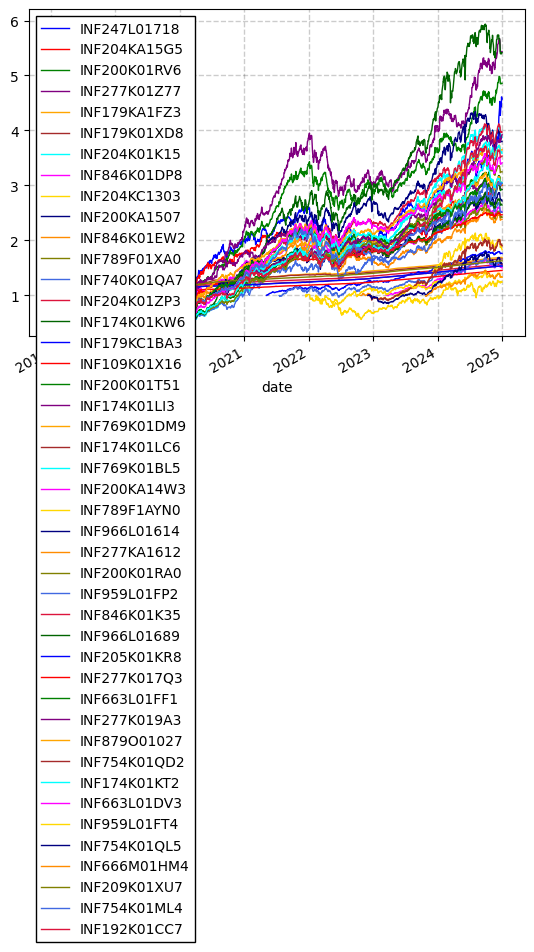

In [91]:
ret_all.quant.to_prices().plot()

In [98]:
ret_all.quant.cagr().sort_values(ascending=False).to_frame("CAGR").T.rename(
    columns=isin_map
).T

,CAGR
UTI NIFTY 500 VALUE 50 INDEX FUND,0.462053
EDELWEISS NIFTY MIDCAP150 MOMENTUM 50 INDEX FUND,0.374577
TATA NIFTY MIDCAP 150 MOMENTUM 50 INDEX FUND,0.352427
MOTILAL OSWAL NASDAQ 100 FUND OF FUND,0.291556
GROWW NIFTY TOTAL MARKET INDEX FUND,0.286284
TATA DIGITAL INDIA FUND,0.281582
QUANT SMALL CAP FUND,0.280775
SBI DIVIDEND YIELD FUND,0.263371
SBI TECHNOLOGY OPPORTUNITIES FUND,0.260634
EDELWEISS NIFTY NEXT 50 INDEX FUND,0.250800


# Replicate portfolio